In [1]:
import numpy as np
import pandas as pd
import sklearn.preprocessing as pre
import sklearn.cluster as cl
import sklearn.decomposition as dc
import sklearn.discriminant_analysis as da

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
twm_customer_raw = pd.read_csv("twm_customer.csv", sep=';')

In [3]:
twm_customer = twm_customer_raw.copy()

find_replace = {"male" : {"M": 1, "F": 0}}
twm_customer['male'] = twm_customer['gender'].str.strip()
twm_customer.replace(find_replace, inplace=True)
twm_customer.set_index('cust_id', inplace=True)
twm_customer

,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,male
cust_id,,,,,,,,,,,,,,,
1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,1
1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,1
1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,0
1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,0
1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,0
1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,1
1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,1


In [4]:
twm_customer.to_csv('demographics.csv')

In [5]:
twm_customer.isna().sum()

income             0
age                0
years_with_bank    0
nbr_children       0
gender             0
marital_status     0
name_prefix        0
first_name         0
last_name          0
street_nbr         0
street_name        0
postal_code        0
city_name          0
state_code         0
male               0
dtype: int64

In [6]:
twm_customer.describe()

,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code,male
count,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,22728.281124,42.479250,3.907631,0.714859,1.882195,8523.109772,59502.690763,0.440428
std,22207.221405,19.114879,2.675634,1.103410,0.892051,5219.488263,31205.926508,0.496771
min,0.000000,13.000000,0.000000,0.000000,1.000000,196.000000,2149.000000,0.000000
25%,7118.500000,28.000000,2.000000,0.000000,1.000000,4295.500000,33145.000000,0.000000
50%,17242.000000,42.000000,4.000000,0.000000,2.000000,8001.000000,64132.000000,0.000000
75%,31338.000000,56.000000,6.000000,1.000000,2.000000,12039.000000,90082.000000,1.000000
max,144157.000000,89.000000,9.000000,5.000000,4.000000,19940.000000,98186.000000,1.000000


In [64]:
num_features = ['income', 'age', 'male', 'years_with_bank', 'nbr_children']
cust_num = twm_customer[
    num_features
]

In [85]:
num_feature_names = ['Income', 'Age', 'Male', 'Years with Bank', 'Number of Children']

In [8]:
scaler = pre.StandardScaler()
cust_scaled = pd.DataFrame(scaler.fit_transform(cust_num))
cust_scaled.columns = cust_num.columns
cust_scaled.index = cust_num.index

In [9]:
cust_scaled

,income,age,male,years_with_bank,nbr_children
cust_id,,,,,
1362691,0.154185,0.184312,1.127172,0.408539,0.258591
1362487,-0.726524,1.493070,1.127172,-1.087435,-0.648298
1363160,-0.188366,-0.234490,-0.887176,1.530520,-0.648298
1362752,1.123798,0.603115,-0.887176,-0.339448,-0.648298
1362548,0.983479,0.864867,-0.887176,1.904514,1.165479
...,...,...,...,...,...
1363324,-0.357478,-0.339191,-0.887176,0.782533,0.258591
1362895,0.164864,0.707816,1.127172,0.782533,0.258591
1362569,1.738064,0.393714,1.127172,-1.461429,1.165479


In [10]:
pca = dc.PCA(n_components=2)
cust_pca = pca.fit_transform(cust_scaled)
cust_pca

array([[ 7.06332236e-01,  1.08445838e-03],
       [-1.32639191e-02, -4.81665003e-01],
       [-3.56814267e-01, -1.31243526e+00],
       ...,
       [ 1.79059818e+00,  1.80709525e+00],
       [-5.82979758e-01, -1.09400558e+00],
       [-1.34792738e+00,  3.24215968e-01]])

In [11]:
pca.explained_variance_ratio_

array([0.28122211, 0.23601805])

<AxesSubplot:>

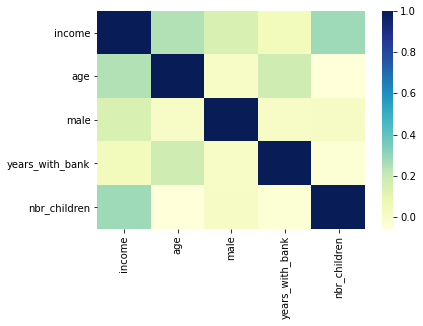

In [12]:
corr = cust_scaled.corr()
sns.heatmap(corr, cmap='YlGnBu')

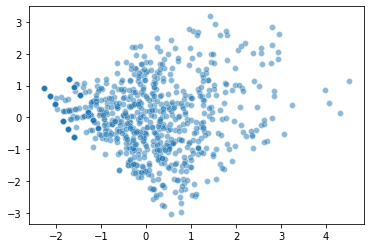

In [13]:
sns.scatterplot(x=cust_pca[:, 0], y=cust_pca[:, 1], alpha=0.5)
plt.show()

In [14]:
def kmeans(n_clusters):
    km = cl.KMeans(n_clusters=n_clusters, random_state=0)
    km.fit(cust_scaled)
    return km

In [15]:
distortions = np.array([[n, kmeans(n).inertia_] for n in range(1, 10)])

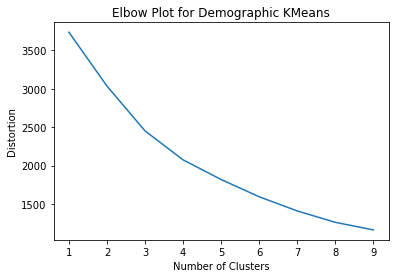

In [133]:
sns.lineplot(x=distortions[:, 0], y=distortions[:, 1])
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Plot for Demographic KMeans')
plt.savefig('elbow.png', dpi=100)
plt.show()

In [17]:
def dbscan(eps):
    db = cl.DBSCAN(eps=eps)
    db.fit(cust_scaled)
    return db

In [18]:
def dbscan_test(eps):
    labels = dbscan(eps).labels_
    return [eps, len(labels[labels == -1]), len(np.unique(labels) - 1)]

In [19]:
db_test = pd.DataFrame([
    dbscan_test(e)
    for e in np.linspace(0.2, 1.2, 21)]
)
db_test.columns = ['epsilon', 'outliers', 'clusters']

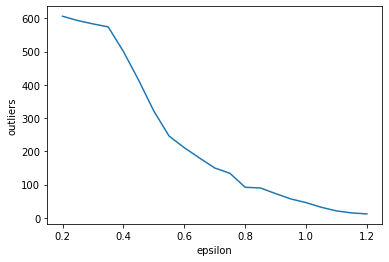

In [20]:
sns.lineplot(data=db_test, x='epsilon', y='outliers')
plt.show()

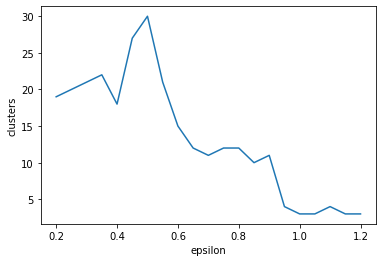

In [21]:
sns.lineplot(data=db_test, x='epsilon', y='clusters')
plt.show()

In [22]:
kmeans_clusters = 4
km4 = kmeans(kmeans_clusters)
km4_centroids = km4.cluster_centers_
km4_labels = km4.labels_

In [23]:
db_labels = dbscan(0.95).labels_

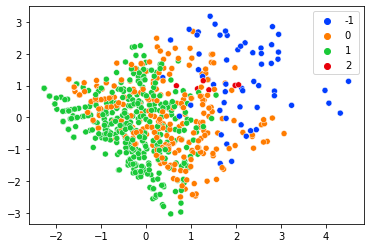

In [24]:
sns.scatterplot(
    x=cust_pca[:, 0], y=cust_pca[:, 1], hue=db_labels, palette='bright'
)
plt.show()

In [25]:
twm_customer[db_labels == 1].gender.value_counts()

F     390
Name: gender, dtype: int64

In [26]:
twm_customer[db_labels == 0].gender.value_counts()

M     294
Name: gender, dtype: int64

In [88]:
def prettify(ax, components, lengths, x=0, y=0):
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    ax.legend().set_title('Cluster')
    
    loadings = components.T * np.sqrt(lengths)
    for i, feature in enumerate(num_feature_names):
        plt.arrow(
            x, y,
            2 * loadings[i, 0], 2 * loadings[i, 1],
            width = 0.03,
            color='k'
        )
        plt.annotate(
            feature, (x + loadings[i, 0] * 2.1, y + loadings[i, 1] * 2.1)
        )

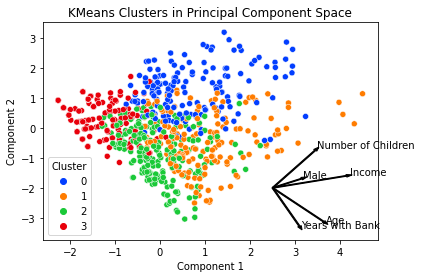

In [135]:
ax = sns.scatterplot(
    x=cust_pca[:, 0], y=cust_pca[:, 1], hue=km4_labels, palette='bright'
)
prettify(ax, pca.components_, transform.explained_variance_, 2.5, -2)
plt.title('KMeans Clusters in Principal Component Space')
plt.savefig('kmeans_pca.png', dpi=100)
plt.show()

In [28]:
pd.crosstab(twm_customer.gender, km4_labels)

col_0,0,1,2,3
gender,,,,
F,96,0,210,112
M,61,174,0,94


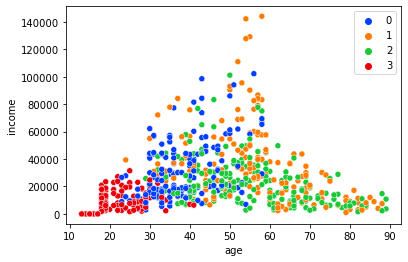

In [29]:
sns.scatterplot(
    data=cust_num, x='age', y='income', hue=km4_labels, palette='bright'
)
plt.show()

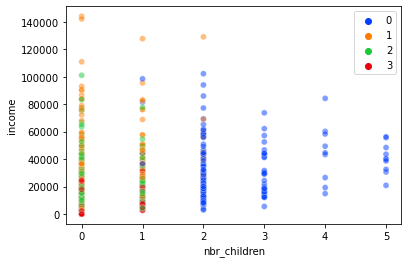

In [30]:
sns.scatterplot(
    data=cust_num, x='nbr_children', y='income', hue=km4_labels, palette='bright', alpha=0.5
)
plt.show()

In [31]:
pd.crosstab(cust_num.nbr_children, km4_labels)

col_0,0,1,2,3
nbr_children,,,,
0,0,122,163,181
1,4,40,45,25
2,96,12,2,0
3,38,0,0,0
4,9,0,0,0
5,10,0,0,0


In [32]:
centroids = pd.DataFrame(scaler.inverse_transform(km4_centroids))
centroids.columns = cust_num.columns
centroids.index = ["Cluster 0", 'Cluster 1', 'Cluster 2', 'Cluster 3']

In [33]:
centroids

,income,age,male,years_with_bank,nbr_children
Cluster 0,31502.407643,38.222930,3.885350e-01,3.312102,2.522293
Cluster 1,34618.212644,56.867816,1.000000e+00,4.482759,0.367816
Cluster 2,23017.842857,56.190476,2.775558e-16,4.309524,0.233333
Cluster 3,5703.067961,19.592233,4.563107e-01,3.466019,0.121359


In [34]:
lda = da.LinearDiscriminantAnalysis(n_components=2)

In [35]:
cust_lda = lda.fit_transform(cust_num, km4_labels)

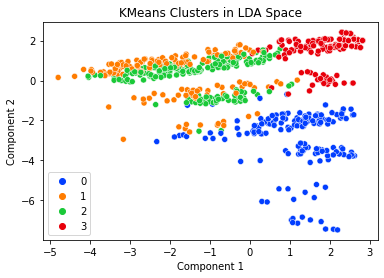

In [139]:
sns.scatterplot(
    x=cust_lda[:, 0], y=cust_lda[:, 1], hue=km4_labels, palette='bright'
)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
ax.legend().set_title('Cluster')
plt.title('KMeans Clusters in LDA Space')
plt.savefig('kmeans_lda.png', dpi=100)
plt.show()

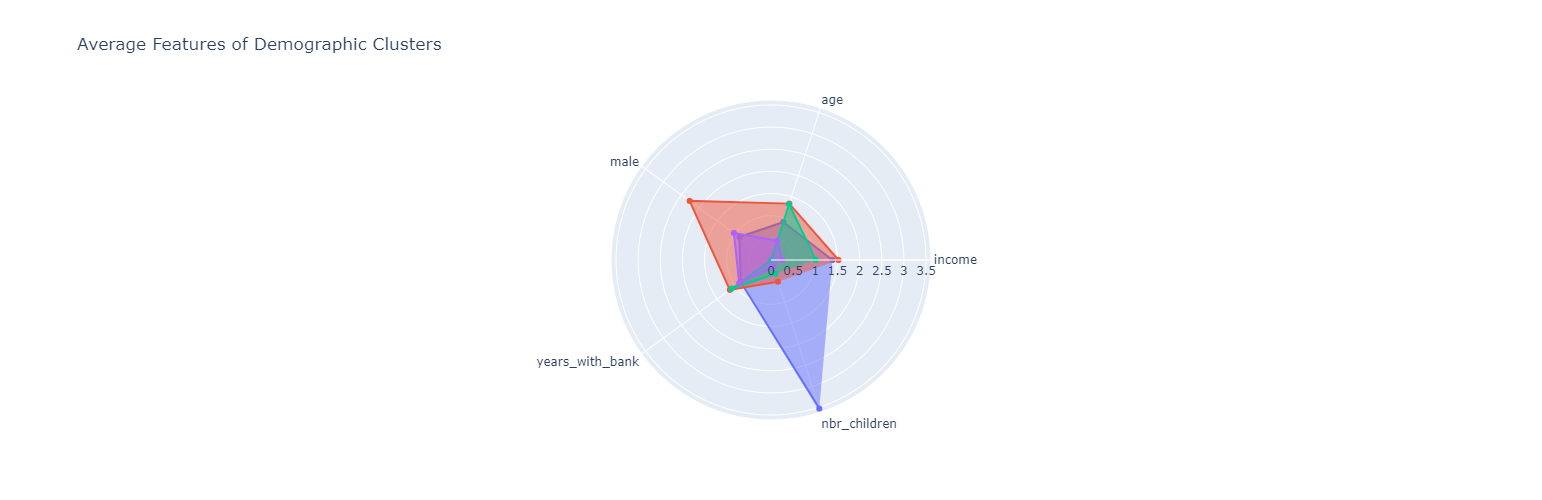

In [129]:
categories = ['income', 'age', 'male', 'years_with_bank', 'nbr_children']

fig = go.Figure()

for label in range(kmeans_clusters):
    fig.add_trace(go.Scatterpolar(
        r=[cust_num[km4_labels == label][cat].mean()/cust_num[cat].mean() for cat in categories],
        theta=categories,
        fill='toself',
        name=f'cluster{label}',
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
              visible=True
        )),
    title='Average Features of Demographic Clusters',
    showlegend=False,
    width=500,
    height=500
)

fig.show()